Jordan King

# Research question/interestsI want to examine the point distributions through the years and evaluate the impact that nationality may have on scores..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv

In [2]:
f1data = pd.read_csv("../data/raw/f1data.csv")

## Milestone 3, Task 1

In [3]:
f1data.shape

(1573, 6)

This lets me know that our data has 1573 rows of data with 6 keys (unique columns).

In [4]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [5]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


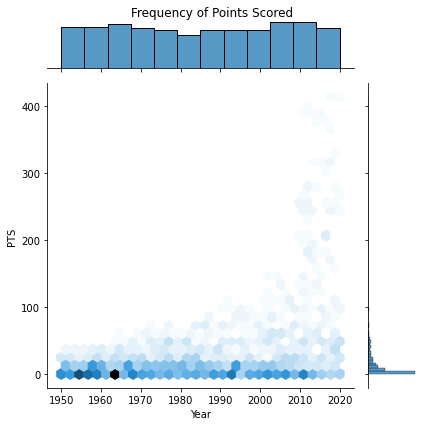

In [6]:
hex=sns.jointplot(x=f1data["Year"], y=f1data["PTS"], kind="hex")
hex.fig.suptitle("Frequency of Points Scored")
hex.fig.tight_layout()
hex.fig.subplots_adjust(top=0.95)

This graphs dramatically illustrates that the majority of drivers in F1 are very low scoring, and that rarely there are multiple high scoring drivers in a year. We can also see that before around 1990, there was no frequency of points scored over 100 but after 1990, it becomes much more frequent.

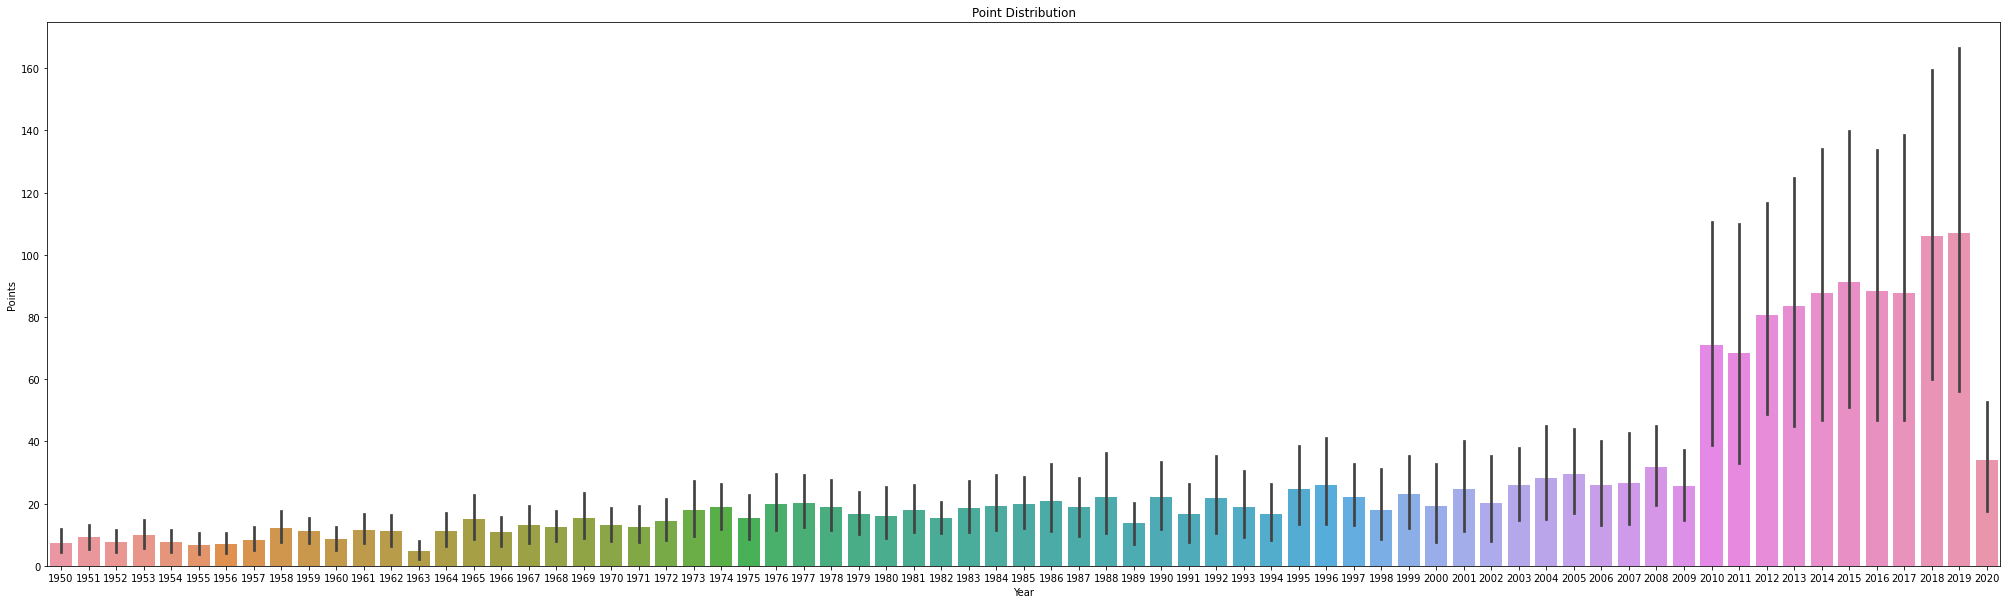

In [7]:
p= sns.barplot(x="Year", y="PTS", data=f1data)
p.set(ylabel="Points", title="Point Distribution")
p.figure.set_size_inches(35,10)

This graph clearly shows that in recent years, there have been more total points rewarded in series. This agrees to indications in our initial research showing that there have been more races added in recent years. It also shows that the biggest jump is between 2009 and 2010, where the average points increases drastically. We can also see that 2020 appears to be an outlier, this can be due to the fact that at the time of this dataset, the 2020 F1 season had not yet concluded.

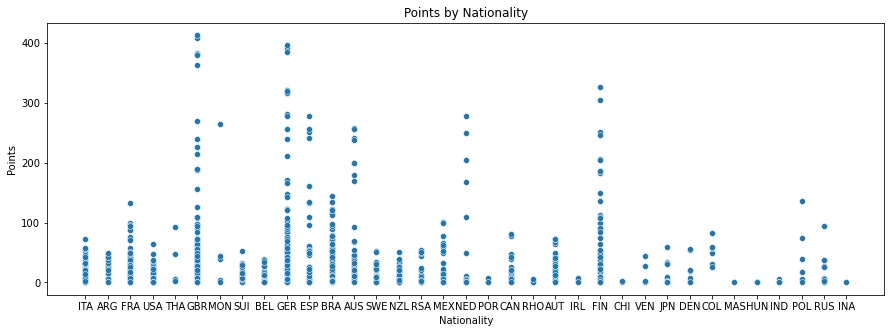

In [8]:
s=sns.scatterplot(data=f1data, x="Nationality", y="PTS")
s.set(ylabel="Points", title="Points by Nationality")
s.figure.set_size_inches(15,5)

This graph breaks down the all time points of all nationalities in F1 pointing towards those which have scored the most points. We can see that GBR (Great Britian), GER (Germany), and FIN (Finland) are the top three highest scoring nationalies but they also appear to have the most data points.

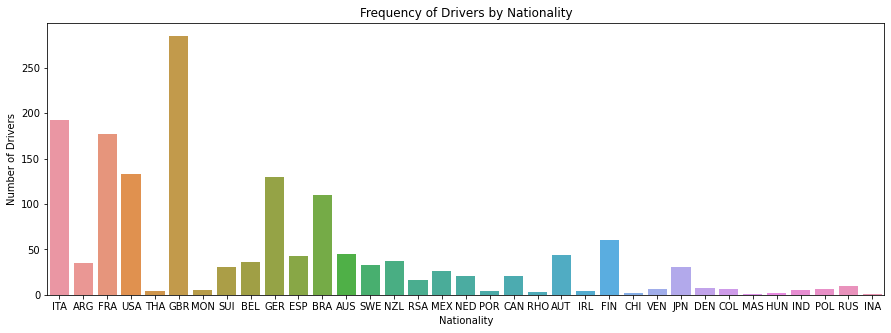

In [9]:
c = sns.countplot(x="Nationality", data=f1data)
c.set(ylabel="Number of Drivers", title="Frequency of Drivers by Nationality")
c.figure.set_size_inches(15,5)

Expanding on the previous graph, I wanted to explore how many data points existed for each Nationality. This is important as it indicates how many drivers raced for each nationality. We can see that similarily, Great Britian has the highest number of drivers with over 250 but Germany and Finland have a much lower number of drivers. Instead ITA (Italy), FRA (France), and USA (United States) have a much higher number of drivers in comparison.

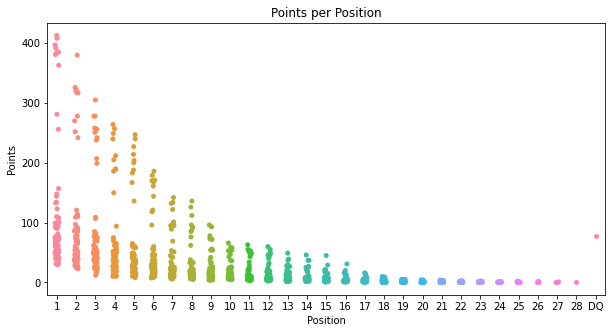

In [10]:
s2=sns.stripplot(data=f1data, x="Pos", y="PTS",order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','DQ'])
s2.set(xlabel="Position", ylabel="Points", title="Points per Position")
s2.figure.set_size_inches(10,5)

This graph displays the total points scored by the varying positions each year. It should be noted that since there is not a fixed number of racers every year, there are some positions that will not have scores each year. There is also notably a special consideration of a DQ, disqualification, one year. As expected, we can see that there are a higher number of points distributed to the higher positions which makes sense considering it is the reward for earning the position. It is interesting however, that there almost appears to be 2 unique patterns between position 1 and 10. We can see the lower portion which is much more saturated and 1 is around 150, and an upper portion which is less saturated and 1 is around 400. Based on our earlier graph which should that after 2010, there was a higher point average, we can theorize that the lower portion of this graph is the earlier years of F1, and the upper portion is years after 2010.

## Milestone 3, Task 2

In [11]:
f1data.rename(columns={"Car": "Team", "Pos": "Position"}, inplace=True)

Checking to see if there are any null values.

In [12]:
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])
plt.show()

Preview of data with null values:
    Position                  Driver Nationality Team   PTS  Year
16        13     Dorino Serafini SER         ITA  NaN   3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN   3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN   1.0  1950
35        12        Louis Rosier ROS         FRA  NaN   3.0  1951
53        13         Ken Wharton WHA         GBR  NaN   3.0  1952
309       18      Masten Gregory GRE         USA  NaN   0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN   0.0  1963
446       13     Richard Attwood ATT         GBR  NaN   3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN  33.0  1971
492       16        Mark Donohue DON         USA  NaN   4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN   4.0  1971


Since we can see that the only null values are in the Team column, we know that these drivers raced independantly and therefore did not belong to a team. We replace these null values instead with "Independant" to accurately represent the data.

In [13]:
f1data["Team"].fillna("Independant", inplace=True)

We then check an example of an entry that previously had a null value to confirm that it worked as expected.

In [14]:
f1data.loc[16,:]

Position                        13
Driver         Dorino Serafini SER
Nationality                    ITA
Team                   Independant
PTS                            3.0
Year                          1950
Name: 16, dtype: object

Checking to see if there are any duplicate entries in our dataset.

In [15]:
duplicateRowsDF = f1data[f1data.duplicated()]
if duplicateRowsDF.empty:
    print("There are no duplicates."),
else:
    print("Duplicate Rows except first occurrence based on all columns are:")
    print(duplicateRowsDF)

There are no duplicates.


Checking to see what the current delimiter for our data is.

In [16]:
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


Since in our inital scan of the dataset, we could see that there was an outstanding error with the name of one driver. We corrected the formatting of his name throughout the dataset.

In [17]:
f1data["Driver"] = f1data["Driver"].replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")

We want to seperate the Driver ID from the Driver column as they are currently grouped. Add a new column for the Driver ID's.

In [18]:
f1data["Driver_ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)

Reorganize columns to be in the most logical order.

In [19]:
f1data = f1data[["Driver", "Driver_ID", "Team", "Nationality", "PTS", "Position", "Year"]]
f1data

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020


## Milestone 3, Task 3

In [20]:
def load_and_process(csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(csv_file)
        .rename(columns={"Car": "Team", "Pos": "Position"})
        .fillna("Independant")
        .replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")
        
        )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(Driver_ID = df1["Driver"].str[-3:],Driver2 = df1["Driver"].str[:-3])
        .drop(columns=["Driver"])
        .rename(columns={"Driver2": "Driver"})
        [["Driver", "Driver_ID", "Team", "Nationality", "PTS", "Position", "Year"]]
      )

    # Make sure to return the latest dataframe

    return df2 


load_and_process("../data/raw/f1data.csv")

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020
